In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the dataset into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\hp\Desktop\test.csv')

In [3]:
# Data Cleaning: Remove rows with missing values
df = df.dropna()

# Replace 'M' with 'Male' and 'F' with 'Female' in 'gender' column
df['gender'] = df['gender'].replace({'m': 'Male', 'f': 'Female'})

In [4]:
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
1,74430,HR,region_4,Bachelor's,Female,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,Male,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,Female,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,Male,sourcing,1,30,4.0,7,0,61
5,46232,Procurement,region_7,Bachelor's,Male,sourcing,1,36,3.0,2,0,68


In [55]:
# Data Analysis: Identify areas for improvement

# Calculate the mean training score by department
print("Mean training score by department:")
print(df.groupby("department")["avg_training_score"].mean())

# Calculate the mean training score by region
print("Mean training score by region:")
print(df.groupby("region")["avg_training_score"].mean())


Mean training score by department:
department
Analytics            84.536735
Finance              60.418891
HR                   50.329218
Legal                59.469974
Operations           60.322057
Procurement          70.180813
R&D                  84.427110
Sales & Marketing    50.120142
Technology           79.844771
Name: avg_training_score, dtype: float64
Mean training score by region:
region
region_1     59.302885
region_10    66.111969
region_11    61.491396
region_12    59.693548
region_13    62.447417
region_14    62.027692
region_15    62.693373
region_16    61.507663
region_17    65.719403
region_18    50.312500
region_19    60.158568
region_2     63.518335
region_20    61.584459
region_21    63.201299
region_22    65.117058
region_23    63.555328
region_24    64.115000
region_25    62.162338
region_26    65.101022
region_27    64.076923
region_28    62.150943
region_29    65.949602
region_3     59.237037
region_30    61.320988
region_31    63.224299
region_32    62.65765

In [56]:
# Predict future performance using Linear Regression

# Prepare the input and output data

from sklearn.linear_model import LinearRegression

# Train linear regression model
X = df[["no_of_trainings", "age", "previous_year_rating", "length_of_service", "awards_won?"]]
y = df["avg_training_score"]
model = LinearRegression().fit(X, y)


In [12]:
# Predict average training score for a hypothetical employee
new_employee = np.array([[2, 30, 3, 5, 0]])
predicted_score = model.predict(new_employee)[0]
print("Predicted average training score for new employee:", predicted_score)

Predicted average training score for new employee: 64.28425197577904


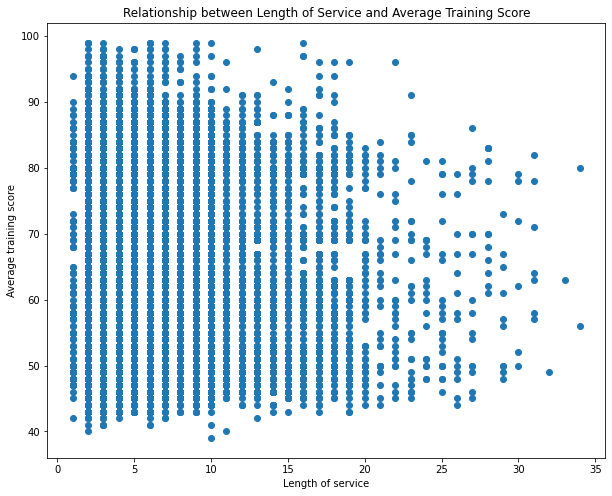

In [21]:
# Create visualizations to gain insights

# Plot the relationship between length of service and average training score

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8)) # set the size of the plot

plt.scatter(df["length_of_service"], df["avg_training_score"])
plt.xlabel("Length of service")
plt.ylabel("Average training score")
plt.title("Relationship between Length of Service and Average Training Score")
plt.show()


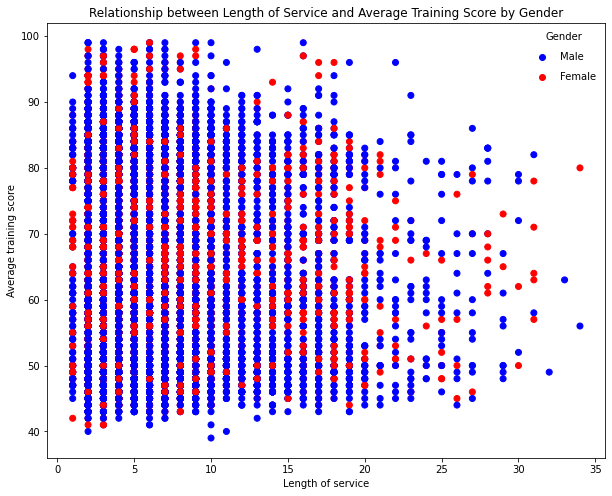

In [22]:
# Plot the relationship between length of service and average training score by gender

plt.figure(figsize=(10,8)) # set the size of the plot
colors = {"Male":"blue", "Female":"red"} # define colors for each gender

plt.scatter(df["length_of_service"], df["avg_training_score"], c=df["gender"].apply(lambda x: colors[x]))

plt.xlabel("Length of service")
plt.ylabel("Average training score")
plt.title("Relationship between Length of Service and Average Training Score by Gender")

# add legend
for gender, color in colors.items():
    plt.scatter([], [], c=color, label=gender)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Gender')

plt.show()


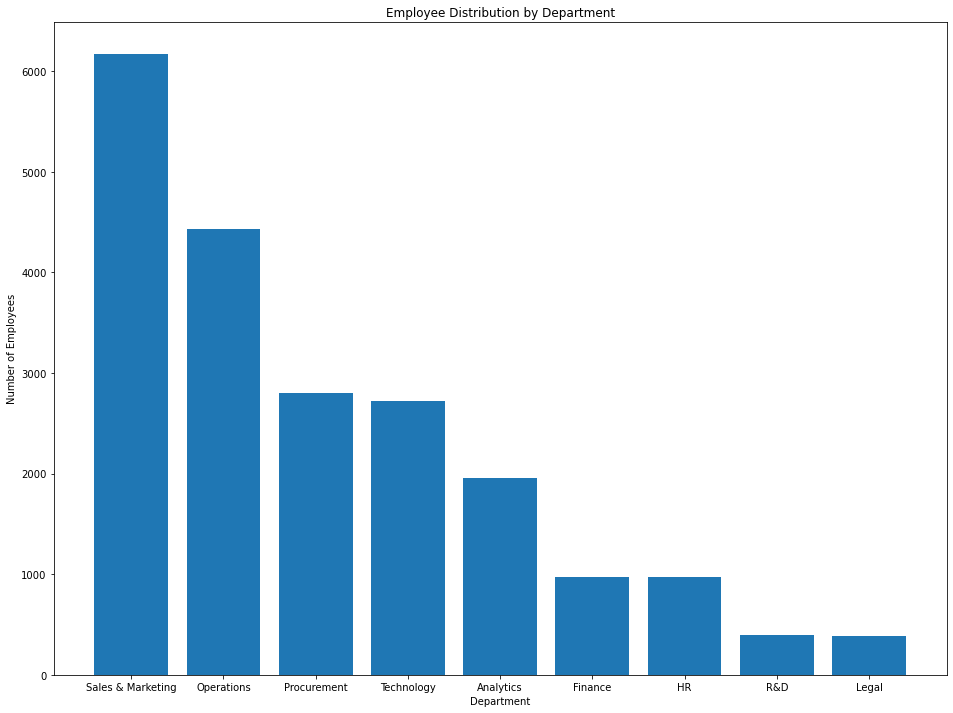

In [29]:
# Count the number of employees in each department and create a bar chart
department_counts = df['department'].value_counts()

# Create a bar chart
plt.figure(figsize=(16, 12))
plt.bar(department_counts.index, department_counts.values)
plt.title('Employee Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()


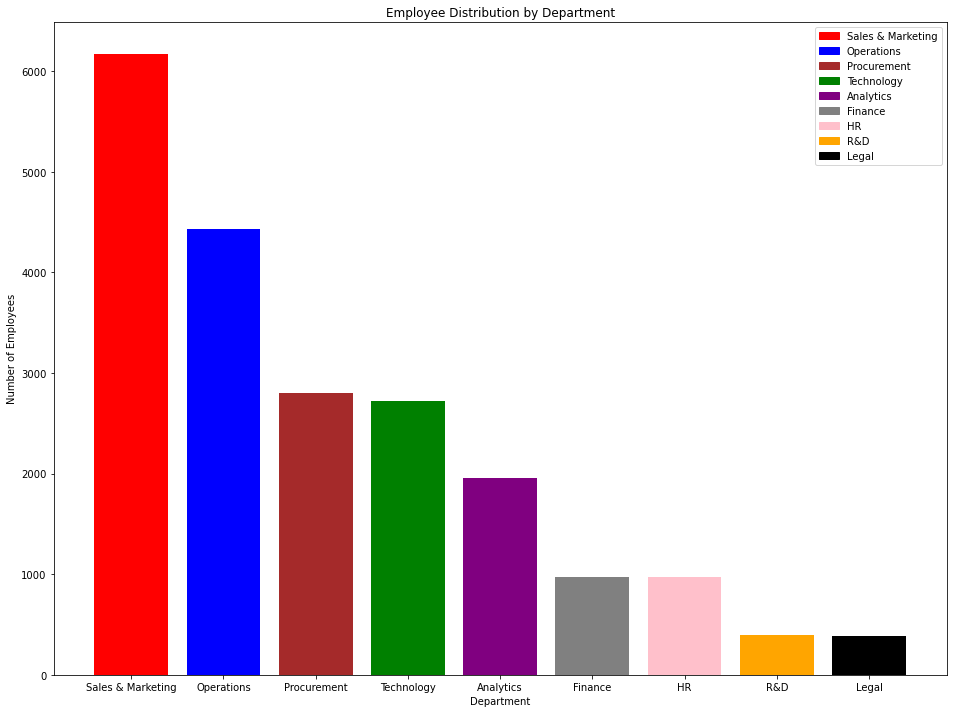

In [30]:
# Define colors for each department
colors = {
    'Sales & Marketing': 'red',
    'Operations': 'blue',
    'Technology': 'green',
    'Analytics': 'purple',
    'R&D': 'orange',
    'Procurement': 'brown',
    'Finance': 'gray',
    'HR': 'pink',
    'Legal': 'black'
}

# Count the number of employees in each department
department_counts = df['department'].value_counts()

# Create a bar chart
plt.figure(figsize=(16, 12))
plt.bar(department_counts.index, department_counts.values, color=[colors[x] for x in department_counts.index])
plt.title('Employee Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')

# Create a legend
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in department_counts.index]
labels = department_counts.index
plt.legend(handles, labels, loc='upper right')

plt.show()


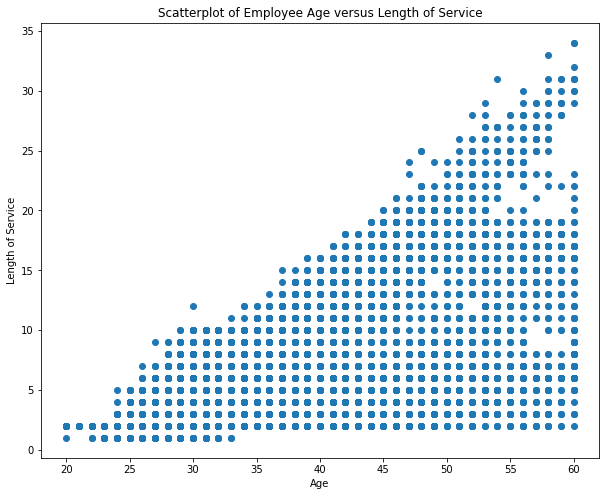

In [72]:


plt.figure(figsize=(10,8))
plt.scatter(df['age'], df['length_of_service'])
plt.title('Scatterplot of Employee Age versus Length of Service')
plt.xlabel('Age')
plt.ylabel('Length of Service')
plt.show()


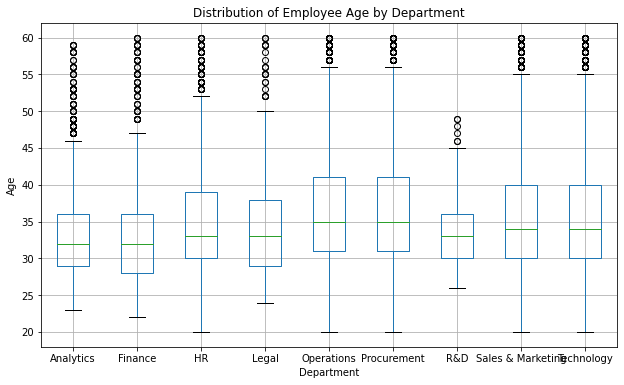

In [66]:
df.boxplot(column='age', by='department', figsize=(10,6))
plt.title('')
plt.suptitle('')
# Add a title to the boxplot
plt.title('Distribution of Employee Age by Department')
plt.xlabel('Department')
plt.ylabel('Age')
plt.show()

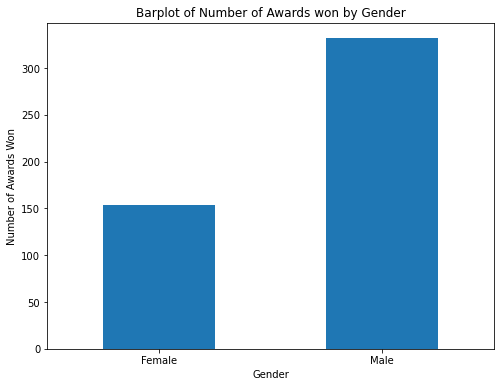

In [6]:

plt.figure(figsize=(8, 6))

awards_won = df[df['awards_won?'] == 1]
awards_won_by_gender = awards_won.groupby('gender')['awards_won?'].count()
awards_won_by_gender.plot(kind='bar', rot=0)
plt.title('Barplot of Number of Awards won by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Awards Won')
plt.show()


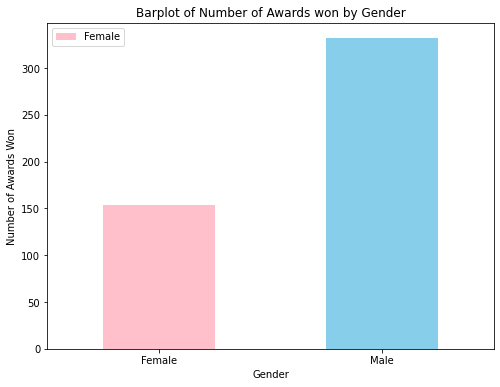

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

awards_won = df[df['awards_won?'] == 1]
awards_won_by_gender = awards_won.groupby('gender')['awards_won?'].count()

colors = ['#FFC0CB', '#87CEEB']  # list of colors for each gender

awards_won_by_gender.plot(kind='bar', rot=0, color=colors)

plt.title('Barplot of Number of Awards won by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Awards Won')

# create a legend for the plot
plt.legend(labels=['Female', 'Male'], loc='upper left')

plt.show()


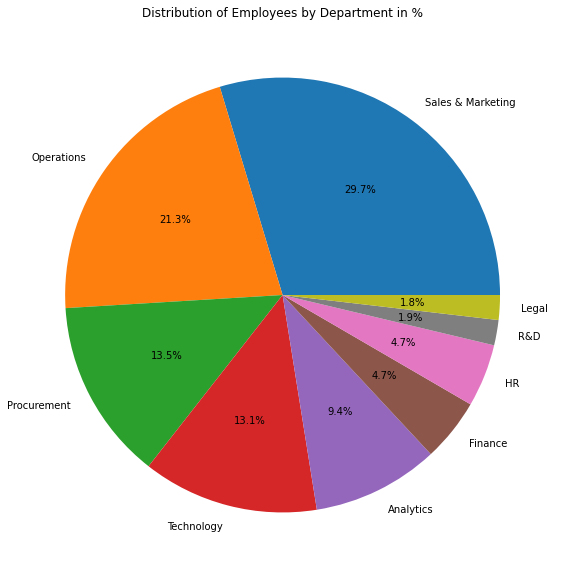

In [12]:
# Count the number of employees in each department
dept_counts = df['department'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
pie = ax.pie(dept_counts.values, labels=dept_counts.index, autopct='%1.1f%%')

# Set title
ax.set_title('Distribution of Employees by Department in %')

# Show the plot
plt.show()


<Figure size 1152x1440 with 0 Axes>

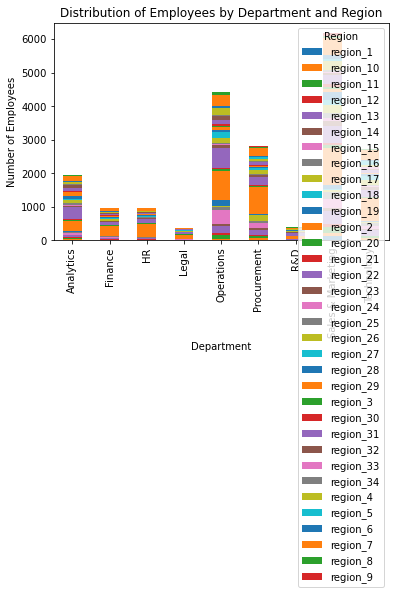

In [9]:


# count number of employees in each department and region
dept_region_counts = df.groupby(["department", "region"])["employee_id"].count()

# plot stacked bar chart
plt.figure(figsize=(16, 20))
dept_region_counts.unstack().plot(kind="bar", stacked=True)
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employees by Department and Region")
plt.legend(title="Region", loc="upper right")
plt.show()


In [ ]:
import seaborn as sns

sns.violinplot(x='department', y='avg_training_score', df=df)


Text(0, 0.5, 'Length of Service')

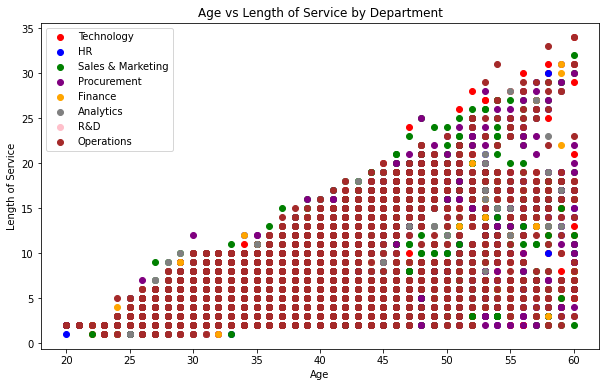

In [32]:
# Scatter plot of age vs. length of service, colored by department:
fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Technology': 'red', 'HR': 'blue', 'Sales & Marketing': 'green', 'Procurement': 'purple', 'Finance': 'orange', 'Analytics': 'gray', 'R&D': 'pink', 'Operations': 'brown'}
for dep, color in colors.items():
    ax.scatter(df[df.department == dep].age, df[df.department == dep].length_of_service, c=color, label=dep)
ax.legend()
ax.set_title('Age vs Length of Service by Department')
ax.set_xlabel('Age')
ax.set_ylabel('Length of Service')


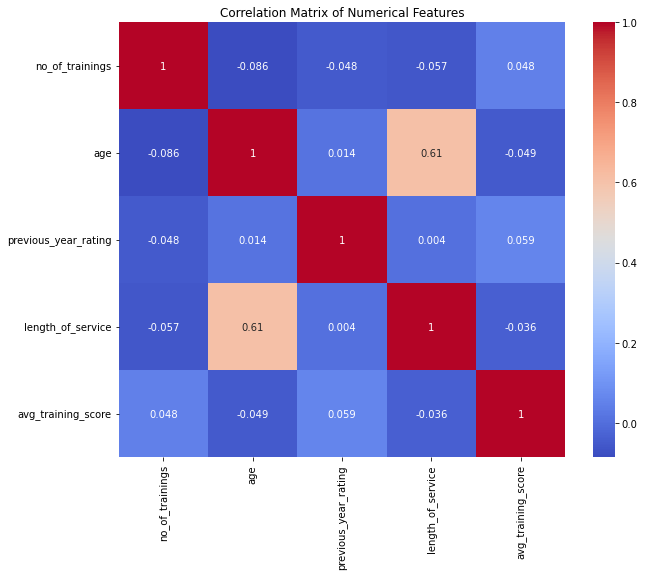

In [35]:
# Heatmap of correlations between numerical features:
fig, ax = plt.subplots(figsize=(10, 8))
numerical_cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
corr = np.corrcoef(df[numerical_cols].values.T)
ax.set_title('Correlation Matrix of Numerical Features')
sns.heatmap(corr, annot=True, cmap='coolwarm', xticklabels=numerical_cols, yticklabels=numerical_cols, ax=ax)
plt.show()


<Figure size 720x576 with 0 Axes>

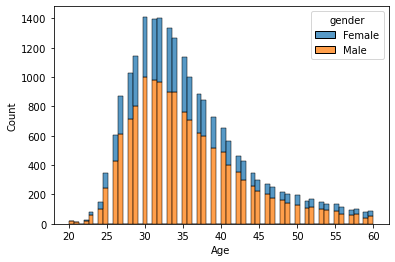

<Figure size 720x576 with 0 Axes>

In [26]:
sns.histplot(data=df, x='age', hue='gender', multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')


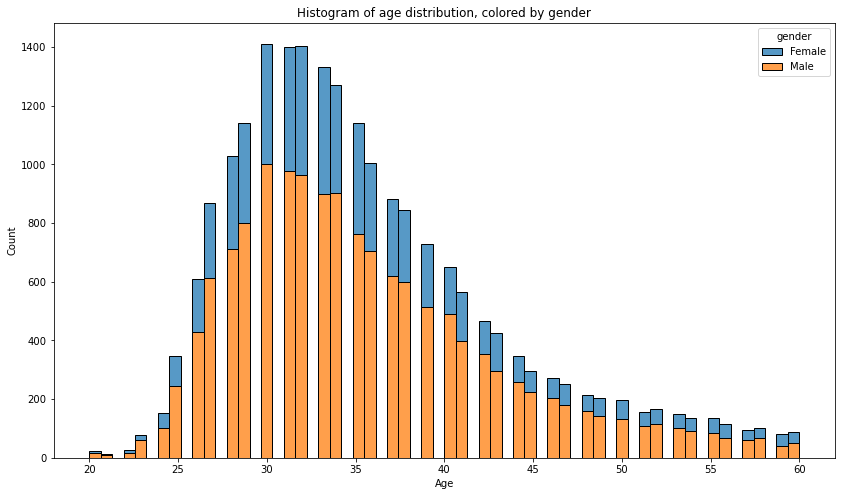

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
plt.title('Histogram of age distribution, colored by gender')
sns.histplot(data=df, x='age', hue='gender', multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
